# Tugas 04 : **Centrality**

NAMA : Mohammad Hasan Basri

NIM  : 210411100169

MATA KULIAH : Pencarian dan Penambangan Web - A

Centrality adalah konsep dalam teori graf yang digunakan untuk mengukur pentingnya suatu simpul (node) dalam sebuah jaringan (graph). Dalam jaringan, simpul-simpul saling terhubung oleh tepi (edges), dan centrality membantu menentukan simpul mana yang paling berpengaruh atau paling "sentral" dalam proses komunikasi, aliran informasi, atau interaksi dalam jaringan tersebut. Ada beberapa jenis centrality yang masing-masing menawarkan cara berbeda untuk menentukan simpul yang penting.

beberapa jenis centrality yang paling umum:

1. Degree Centrality (Sentralitas Derajat) :
*   Mengukur seberapa banyak koneksi langsung yang dimiliki oleh suatu simpul.
*   Semakin banyak koneksi langsung, semakin besar degree centrality simpul tersebut.
*   Contoh: Dalam jaringan sosial, seseorang yang memiliki banyak teman atau kontak langsung akan memiliki degree centrality yang tinggi.

2. Closeness Centrality (Sentralitas Kedekatan) :
*   Mengukur seberapa dekat suatu simpul dengan simpul lain dalam jaringan.
*   Semakin kecil total jarak antara simpul tersebut dengan semua simpul lainnya, semakin tinggi closeness centrality-nya.
*   Contoh: Dalam sebuah jaringan transportasi, simpul yang bisa mencapai simpul lain dengan cepat memiliki closeness centrality yang tinggi.

3. Betweenness Centrality (Sentralitas Keterhubungan) :
*   Mengukur seberapa sering suatu simpul berada di antara jalur terpendek (shortest path) antara dua simpul lainnya.
*   Simpul dengan betweenness centrality tinggi berperan sebagai "jembatan" atau perantara dalam jaringan, yang memungkinkan aliran informasi melalui mereka.
*   Contoh: Dalam sebuah jaringan bisnis, seseorang yang menjadi perantara komunikasi antara dua kelompok mungkin memiliki betweenness centrality yang tinggi.

5. Eigenvector Centrality (Sentralitas Eigenvector):
*   Tidak hanya menghitung berapa banyak koneksi yang dimiliki oleh suatu simpul, tetapi juga seberapa penting koneksi-koneksi tersebut.
*   Simpul yang terhubung dengan simpul penting lainnya akan memiliki eigenvector centrality yang tinggi.
*   Contoh: Dalam jaringan sosial, seseorang yang memiliki koneksi ke orang-orang yang sangat berpengaruh akan memiliki eigenvector centrality yang tinggi.

Centrality digunakan dalam berbagai bidang seperti ilmu sosial, biologi, ekonomi, dan ilmu komputer untuk menganalisis struktur jaringan dan mengidentifikasi simpul kunci yang memiliki pengaruh besar dalam jaringan tersebut.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pickle
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/PPWA/report/Tugas-PPWA/hasil_preprocesing.csv")
df.head()

,Unnamed: 0,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,Filtering/stopword removal
0,0,"Labuan Bajo Tak Lepas dari Bahaya Tsunami, BNP...","Rabu, 25 Sep 2024 20:31 WIB","Jakarta - Labuan Bajo, Manggarai Barat, Nusa T...",pariwisata,Jakarta Labuan Bajo Manggarai Barat Nusa Teng...,jakarta labuan bajo manggarai barat nusa teng...,"['jakarta', 'labuan', 'bajo', 'manggarai', 'ba...",jakarta labuan bajo manggarai barat nusa tengg...
1,1,Kapsul Waktu! Catatan Arkeolog 200 Tahun Lalu ...,"Rabu, 25 Sep 2024 20:05 WIB","Jakarta - Harta karun tak hanya benda saja, ta...",pariwisata,Jakarta Harta karun tak hanya benda saja tapi...,jakarta harta karun tak hanya benda saja tapi...,"['jakarta', 'harta', 'karun', 'tak', 'hanya', ...",jakarta harta karun benda catatan arkeolog lam...
2,2,Jembatan Ikonik Kota Dunia Ini Kini Hanya Bole...,"Rabu, 25 Sep 2024 19:31 WIB","Jakarta - Ibu kota Prancis, Paris, menjadi per...",pariwisata,Jakarta Ibu kota Prancis Paris menjadi perhat...,jakarta ibu kota prancis paris menjadi perhat...,"['jakarta', 'ibu', 'kota', 'prancis', 'paris',...",jakarta kota prancis paris perhatian dunia men...
3,3,Pencarian Kapibara Kabur Dihentikan karena Ter...,"Rabu, 25 Sep 2024 19:05 WIB",Jakarta - Kapibara kabur dari kandangnya di Th...,pariwisata,Jakarta Kapibara kabur dari kandangnya di The...,jakarta kapibara kabur dari kandangnya di the...,"['jakarta', 'kapibara', 'kabur', 'dari', 'kand...",jakarta kapibara kabur kandangnya the hoo zoo ...
4,4,Berburu 'Harta Karun' di Pasar Loak Jatinegara,"Rabu, 25 Sep 2024 19:00 WIB",Jakarta - Pasar Loak Jatinegara atau Jembatan ...,pariwisata,Jakarta Pasar Loak Jatinegara atau Jembatan I...,jakarta pasar loak jatinegara atau jembatan i...,"['jakarta', 'pasar', 'loak', 'jatinegara', 'at...",jakarta pasar loak jatinegara jembatan item pi...


In [ ]:
import ast
import pandas as pd

# Salin dataframe
df_doc = df.copy()

# Fungsi untuk menangani literal_eval dengan aman
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except (ValueError, SyntaxError):
        return x  # Kembalikan nilai asli jika tidak bisa di-evaluasi

# Mengonversi string menjadi list jika perlu
df_doc['Filtering/stopword removal'] = df_doc['Filtering/stopword removal'].apply(safe_literal_eval)

# Membuat kolom baru 'clean_text' dengan menggabungkan list dalam 'stopword_removal' menjadi kalimat biasa
df_doc['clean_text'] = df_doc['Filtering/stopword removal'].apply(lambda x: ' '.join([str(word) for word in x]) if isinstance(x, list) else str(x))

df_doc


,Unnamed: 0,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,Filtering/stopword removal,clean_text
0,0,"Labuan Bajo Tak Lepas dari Bahaya Tsunami, BNP...","Rabu, 25 Sep 2024 20:31 WIB","Jakarta - Labuan Bajo, Manggarai Barat, Nusa T...",pariwisata,Jakarta Labuan Bajo Manggarai Barat Nusa Teng...,jakarta labuan bajo manggarai barat nusa teng...,"['jakarta', 'labuan', 'bajo', 'manggarai', 'ba...",jakarta labuan bajo manggarai barat nusa tengg...,jakarta labuan bajo manggarai barat nusa tengg...
1,1,Kapsul Waktu! Catatan Arkeolog 200 Tahun Lalu ...,"Rabu, 25 Sep 2024 20:05 WIB","Jakarta - Harta karun tak hanya benda saja, ta...",pariwisata,Jakarta Harta karun tak hanya benda saja tapi...,jakarta harta karun tak hanya benda saja tapi...,"['jakarta', 'harta', 'karun', 'tak', 'hanya', ...",jakarta harta karun benda catatan arkeolog lam...,jakarta harta karun benda catatan arkeolog lam...
2,2,Jembatan Ikonik Kota Dunia Ini Kini Hanya Bole...,"Rabu, 25 Sep 2024 19:31 WIB","Jakarta - Ibu kota Prancis, Paris, menjadi per...",pariwisata,Jakarta Ibu kota Prancis Paris menjadi perhat...,jakarta ibu kota prancis paris menjadi perhat...,"['jakarta', 'ibu', 'kota', 'prancis', 'paris',...",jakarta kota prancis paris perhatian dunia men...,jakarta kota prancis paris perhatian dunia men...
3,3,Pencarian Kapibara Kabur Dihentikan karena Ter...,"Rabu, 25 Sep 2024 19:05 WIB",Jakarta - Kapibara kabur dari kandangnya di Th...,pariwisata,Jakarta Kapibara kabur dari kandangnya di The...,jakarta kapibara kabur dari kandangnya di the...,"['jakarta', 'kapibara', 'kabur', 'dari', 'kand...",jakarta kapibara kabur kandangnya the hoo zoo ...,jakarta kapibara kabur kandangnya the hoo zoo ...
4,4,Berburu 'Harta Karun' di Pasar Loak Jatinegara,"Rabu, 25 Sep 2024 19:00 WIB",Jakarta - Pasar Loak Jatinegara atau Jembatan ...,pariwisata,Jakarta Pasar Loak Jatinegara atau Jembatan I...,jakarta pasar loak jatinegara atau jembatan i...,"['jakarta', 'pasar', 'loak', 'jatinegara', 'at...",jakarta pasar loak jatinegara jembatan item pi...,jakarta pasar loak jatinegara jembatan item pi...
...,...,...,...,...,...,...,...,...,...,...
95,95,10 Hadits tentang Sabar dalam Menghadapi Cobaa...,"Senin, 23 Sep 2024 20:45 WIB",Jakarta - Setiap manusia akan diuji dengan ber...,Keislaman,Jakarta Setiap manusia akan diuji dengan berb...,jakarta setiap manusia akan diuji dengan berb...,"['jakarta', 'setiap', 'manusia', 'akan', 'diuj...",jakarta manusia diuji cobaan hidup allah swt m...,jakarta manusia diuji cobaan hidup allah swt m...
96,96,"Apa Itu Tawakal? Ini Arti, Tingkatan dan Hadit...","Senin, 23 Sep 2024 20:00 WIB",Jakarta - Tawakal identik dengan kepasrahan at...,Keislaman,Jakarta Tawakal identik dengan kepasrahan ata...,jakarta tawakal identik dengan kepasrahan ata...,"['jakarta', 'tawakal', 'identik', 'dengan', 'k...",jakarta tawakal identik kepasrahan menyerahkan...,jakarta tawakal identik kepasrahan menyerahkan...
97,97,Pengertian Nadzor dalam Islam dan Adab yang Ha...,"Senin, 23 Sep 2024 19:15 WIB",Jakarta - Nadzor menjadi istilah yang kerap di...,Keislaman,Jakarta Nadzor menjadi istilah yang kerap dij...,jakarta nadzor menjadi istilah yang kerap dij...,"['jakarta', 'nadzor', 'menjadi', 'istilah', 'y...",jakarta nadzor istilah kerap dijumpai fikih pe...,jakarta nadzor istilah kerap dijumpai fikih pe...
98,98,Apakah Orang Tua Bisa Durhaka kepada Anak?,"Senin, 23 Sep 2024 18:30 WIB","Jakarta - Dalam Islam, durhaka tidak hanya ber...",Keislaman,Jakarta Dalam Islam durhaka tidak hanya berla...,jakarta dalam islam durhaka tidak hanya berla...,"['jakarta', 'dalam', 'islam', 'durhaka', 'tida...",jakarta islam durhaka berlaku anak orang tua o...,jakarta islam durhaka berlaku anak orang tua o...


In [ ]:
# Cek jumlah missing values di setiap kolom
missing_values = df_doc.isnull().sum()
print("Jumlah missing values per kolom:")
print(missing_values)

Jumlah missing values per kolom:
Unnamed: 0                    0
judul                         0
tanggal                       0
isi                           0
kategori                      0
cleansing                     0
case_folding                  0
tokenize                      0
Filtering/stopword removal    0
clean_text                    0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Transformasi data kategorik
label_encoder = LabelEncoder()
df_doc.loc[:, 'kategori_encoded'] = label_encoder.fit_transform(df_doc['kategori'])

# Menampilkan nilai sebelum dan sesudah konversi
print("\nNilai sebelum dan sesudah konversi:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

print("\nDataFrame setelah Label Encoding:")
print(df_doc)



Nilai sebelum dan sesudah konversi:
{'Keislaman': 0, 'pariwisata': 1}

DataFrame setelah Label Encoding:
    Unnamed: 0                                              judul  \
0            0  Labuan Bajo Tak Lepas dari Bahaya Tsunami, BNP...   
1            1  Kapsul Waktu! Catatan Arkeolog 200 Tahun Lalu ...   
2            2  Jembatan Ikonik Kota Dunia Ini Kini Hanya Bole...   
3            3  Pencarian Kapibara Kabur Dihentikan karena Ter...   
4            4     Berburu 'Harta Karun' di Pasar Loak Jatinegara   
..         ...                                                ...   
95          95  10 Hadits tentang Sabar dalam Menghadapi Cobaa...   
96          96  Apa Itu Tawakal? Ini Arti, Tingkatan dan Hadit...   
97          97  Pengertian Nadzor dalam Islam dan Adab yang Ha...   
98          98         Apakah Orang Tua Bisa Durhaka kepada Anak?   
99          99  Bertasbih 100 Kali Sehari Dapat Pahala 1000 Ke...   

                         tanggal  \
0    Rabu, 25 Sep 2024 20:31 

In [ ]:
# Menyimpan DataFrame ke file CSV
df_doc.to_csv('FILETUGAS4.csv', index=False)

# **Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
x = df_doc['clean_text']
y = df_doc['kategori_encoded']

print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

print("="*50)
print("Jumlah data latih:", len(x_train))
print("Jumlah data uji:", len(x_test))

0     jakarta labuan bajo manggarai barat nusa tengg...
1     jakarta harta karun benda catatan arkeolog lam...
2     jakarta kota prancis paris perhatian dunia men...
3     jakarta kapibara kabur kandangnya the hoo zoo ...
4     jakarta pasar loak jatinegara jembatan item pi...
                            ...                        
95    jakarta manusia diuji cobaan hidup allah swt m...
96    jakarta tawakal identik kepasrahan menyerahkan...
97    jakarta nadzor istilah kerap dijumpai fikih pe...
98    jakarta islam durhaka berlaku anak orang tua o...
99    jakarta rasulullah saw menganjurkan bertasbih ...
Name: clean_text, Length: 100, dtype: object
0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: kategori_encoded, Length: 100, dtype: int64
Jumlah data latih: 80
Jumlah data uji: 20


# **TF-IDF Weighting**

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit dan transform pada data training
x_train_tfidf = tfidf.fit_transform(x_train)

# Mendapatkan nama fitur dari TF-IDF
feature_names = tfidf.get_feature_names_out()

# Konversi TF-IDF hasil training ke DataFrame
df_train_tfidf = pd.DataFrame(x_train_tfidf.toarray(), columns=feature_names)

df_train_tfidf

,aadimmirrusulih,aailan,aainkalkauar,aajilan,aajilin,aakaami,aalam,aan,aawaa,abad,...,zaujni,zhilalil,zhirbi,ziarah,ziljalali,zina,zinah,zoo,zuleima,zulu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.078812,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.050635,0.0,0.0
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
# Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_train_tfidf_binary = df_train_tfidf.apply(lambda col: col.map(lambda x: 1 if x >= 0.5 else 0))

# Menampilkan DataFrame dengan nilai biner
df_train_tfidf_binary

,aadimmirrusulih,aailan,aainkalkauar,aajilan,aajilin,aakaami,aalam,aan,aawaa,abad,...,zaujni,zhilalil,zhirbi,ziarah,ziljalali,zina,zinah,zoo,zuleima,zulu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_train_tfidf_binary.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame untuk lebih mudah dilihat
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

           Node  Degree Centrality
1063    content           0.000341
1721      found           0.000341
3920        not           0.000341
1853      hamil           0.000170
393          as           0.000170
...         ...                ...
1960  hujanilah           0.000000
1958  hudzaifah           0.000000
1957        hud           0.000000
1956   hubungan           0.000000
5871       zulu           0.000000

[5872 rows x 2 columns]


In [ ]:
# Menghapus fitur di bawah top 10 terbaik
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()
filtered_df_train_tfidf_binary = df_train_tfidf_binary[top_10_features]

# Tampilkan hasil DataFrame yang sudah difilter
print("\nDataFrame setelah menghapus fitur di bawah top 10:")
print(filtered_df_train_tfidf_binary)


DataFrame setelah menghapus fitur di bawah top 10:
    content  found  not  hamil  as  hujan  pin  yusuf  doa  nishrin
0         0      0    0      0   0      0    0      0    0        0
1         0      0    0      0   0      0    0      0    0        0
2         0      0    0      0   0      0    0      0    0        0
3         0      0    0      0   0      0    0      0    0        0
4         0      0    0      1   0      0    1      0    0        0
..      ...    ...  ...    ...  ..    ...  ...    ...  ...      ...
75        0      0    0      0   0      0    0      0    0        0
76        0      0    0      0   0      0    0      0    0        0
77        0      0    0      0   0      0    0      0    0        0
78        0      0    0      0   0      0    0      0    0        0
79        0      0    0      0   0      0    0      0    0        0

[80 rows x 10 columns]


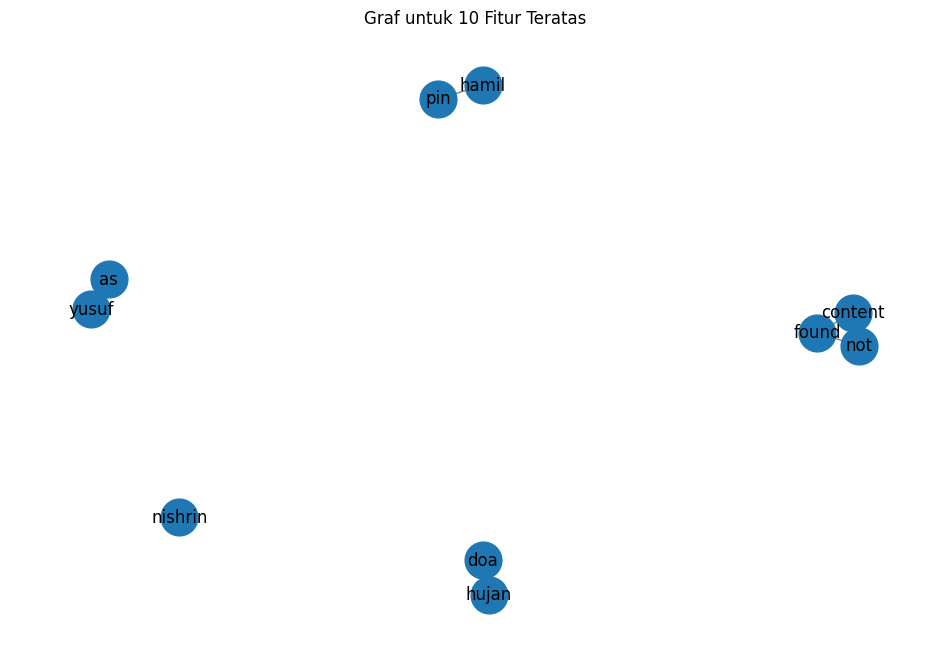

In [ ]:
import matplotlib.pyplot as plt

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence dari fitur teratas
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()
    active_top_10_features = [f for f in active_features if f in top_10_features]

    for j in range(len(active_top_10_features)):
        for k in range(j + 1, len(active_top_10_features)):
            G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

# Mengatur ukuran figure untuk visualisasi graf
plt.figure(figsize=(12, 8))

# Menggambar graf fitur teratas
pos = nx.spring_layout(G_top_10)  # Menggunakan layout spring
nx.draw_networkx_nodes(G_top_10, pos, node_size=700)  # Menggambar node
nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)  # Menggambar edge
nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')  # Menggambar label

# Menampilkan graf
plt.title('Graf untuk 10 Fitur Teratas')
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

In [ ]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

      Node  Degree Centrality  Closeness Centrality  Betweenness Centrality
0  content           0.000341              0.222222                     0.0
1    found           0.000341              0.222222                     0.0
2      not           0.000341              0.222222                     0.0
3    hamil           0.000170              0.111111                     0.0
4       as           0.000170              0.111111                     0.0
5    hujan           0.000170              0.111111                     0.0
6      pin           0.000170              0.111111                     0.0
7    yusuf           0.000170              0.111111                     0.0
8      doa           0.000170              0.111111                     0.0
9  nishrin           0.000000              0.000000                     0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity
cosine_sim_matrix = cosine_similarity(df_train_tfidf_binary[top_10_features].T)

# Membuat DataFrame untuk cosine similarity
df_cosine_sim = pd.DataFrame(cosine_sim_matrix, index=top_10_features, columns=top_10_features)

# Menampilkan hasil cosine similarity
print("Cosine Similarity antara Fitur Teratas:")
print(df_cosine_sim)

Cosine Similarity antara Fitur Teratas:
         content  found  not  hamil   as  hujan  pin  yusuf  doa  nishrin
content      1.0    1.0  1.0    0.0  0.0    0.0  0.0    0.0  0.0      0.0
found        1.0    1.0  1.0    0.0  0.0    0.0  0.0    0.0  0.0      0.0
not          1.0    1.0  1.0    0.0  0.0    0.0  0.0    0.0  0.0      0.0
hamil        0.0    0.0  0.0    1.0  0.0    0.0  1.0    0.0  0.0      0.0
as           0.0    0.0  0.0    0.0  1.0    0.0  0.0    1.0  0.0      0.0
hujan        0.0    0.0  0.0    0.0  0.0    1.0  0.0    0.0  0.5      0.0
pin          0.0    0.0  0.0    1.0  0.0    0.0  1.0    0.0  0.0      0.0
yusuf        0.0    0.0  0.0    0.0  1.0    0.0  0.0    1.0  0.0      0.0
doa          0.0    0.0  0.0    0.0  0.0    0.5  0.0    0.0  1.0      0.0
nishrin      0.0    0.0  0.0    0.0  0.0    0.0  0.0    0.0  0.0      0.0


# Ke 2 : Ambil 1 Berita

Berita Detik Travel : https://travel.detik.com/travel-news/d-7578223/polisi-open-trip-siswi-semarang-yang-hilang-di-gunung-slamet-langgar-aturan

Isi Berita Otomotif : Jakarta - Seorang pendaki open trip ke Gunung Slamet sempat hilang dan ditemukan selamat. Polisi mengatakan bahwa kelompok itu telah melanggar aturan. Open trip yang diikuti siswi Semarang yang sempat tersesat di jalur pendakian Gunung Slamet diduga melanggar batas aman radius dari puncak. Sebab, dari data yang dirilis Pusat Vulkanologi dan Mitigasi Bencana Geologi (PVMBG) hingga saat ini, status Gunung Slamet masih waspada level II. Kapolres Purbalingga, AKBP Rosyid Hartanto mengungkapkan, sebelumnya para pendaki tersebut sudah menandatangani surat pernyataan untuk tidak mendaki sampai puncak. Namun, kesepakatan itu tidak dipatuhi.


Berita Detik Hikmah : https://www.detik.com/hikmah/doa-dan-hadits/d-7579552/kumpulan-doa-bepergian-yang-bisa-diamalkan-muslim

Isi berita : Jakarta - Doa bepergian bisa diamalkan muslim ketika akan melakukan perjalanan. Dalam Islam, muslim diperintahkan untuk berdoa kepada Allah SWT sebagaimana firman-Nya dalam surat Al Gafir ayat 60,
وَقَالَ رَبُّكُمُ ادْعُوْنِيْٓ اَسْتَجِبْ لَكُمْ ۗاِنَّ الَّذِيْنَ يَسْتَكْبِرُوْنَ عَنْ عِبَادَتِيْ سَيَدْخُلُوْنَ جَهَنَّمَ دَاخِرِيْنَ ࣖࣖࣖ ٦٠

Artinya: "Tuhanmu berfirman, "Berdoalah kepada-Ku, niscaya akan Aku perkenankan bagimu (apa yang kamu harapkan). Sesungguhnya orang-orang yang menyombongkan diri tidak mau beribadah kepada-Ku akan masuk (neraka) Jahanam dalam keadaan hina dina."


In [ ]:
# Mengimpor library yang diperlukan
import pandas as pd

# Teks berita yang telah dirapikan
news_textTravel_1 = """Jakarta - Seorang pendaki open trip ke Gunung Slamet sempat hilang dan ditemukan selamat. Polisi mengatakan bahwa kelompok itu telah melanggar aturan. Open trip yang diikuti siswi Semarang yang sempat tersesat di jalur pendakian Gunung Slamet diduga melanggar batas aman radius dari puncak. Sebab, dari data yang dirilis Pusat Vulkanologi dan Mitigasi Bencana Geologi (PVMBG) hingga saat ini, status Gunung Slamet masih waspada level II. Kapolres Purbalingga, AKBP Rosyid Hartanto mengungkapkan, sebelumnya para pendaki tersebut sudah menandatangani surat pernyataan untuk tidak mendaki sampai puncak. Namun, kesepakatan itu tidak dipatuhi."""

news_textHikmah_2 = """Jakarta - Doa bepergian bisa diamalkan muslim ketika akan melakukan perjalanan. Dalam Islam, muslim diperintahkan untuk berdoa kepada Allah SWT sebagaimana firman-Nya dalam surat Al Gafir ayat 60, Artinya: Tuhanmu berfirman, Berdoalah kepada-Ku, niscaya akan Aku perkenankan bagimu (apa yang kamu harapkan). Sesungguhnya orang-orang yang menyombongkan diri tidak mau beribadah kepada-Ku akan masuk (neraka) Jahanam dalam keadaan hina dina."""

# Mengubah teks menjadi DataFrame
data = pd.DataFrame([news_textTravel_1, news_textHikmah_2], columns=['text'])

# Menampilkan DataFrame
print(data)


                                                text
0  Jakarta - Seorang pendaki open trip ke Gunung ...
1  Jakarta - Doa bepergian bisa diamalkan muslim ...


In [ ]:
# Mengimpor library yang diperlukan
from sklearn.feature_extraction.text import TfidfVectorizer

# Menghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

# Mengambil nama fitur (kata) dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Menghitung skor TF-IDF untuk setiap fitur
tfidf_scores = tfidf_matrix.toarray()
df_tfidf_scores = pd.DataFrame(tfidf_scores, columns=feature_names)

# Mengurutkan DataFrame berdasarkan skor TF-IDF dari terbesar ke terkecil
df_top_features = df_tfidf_scores.sum(axis=0).reset_index()
df_top_features.columns = ['Feature', 'Score']

# Pastikan kolom 'Score' adalah tipe data numerik
df_top_features['Score'] = pd.to_numeric(df_top_features['Score'], errors='coerce')

# Mengurutkan berdasarkan skor
df_top_features = df_top_features.sort_values(by='Score', ascending=False)

# Mengambil 10 fitur terbaik
top_10_features = df_top_features.head(10)

# Menampilkan 10 fitur terbaik
print("10 Fitur Terbaik:\n", top_10_features)


10 Fitur Terbaik:
     Feature     Score
118    yang  0.351633
57   kepada  0.327230
1      akan  0.327230
21    dalam  0.327230
104  slamet  0.276056
39   gunung  0.276056
60       ku  0.218153
73   muslim  0.218153
79    orang  0.218153
112   tidak  0.208553


In [ ]:
# Mengimpor library yang diperlukan
from sklearn.metrics.pairwise import cosine_similarity

# Mengambil hanya nama fitur dari 10 fitur teratas
top_10_feature_names = top_10_features['Feature'].values

# Mengambil indeks fitur di vocabulary
top_10_feature_indices = [tfidf_vectorizer.vocabulary_[feature] for feature in top_10_feature_names]

# Mengambil kolom TF-IDF untuk 10 fitur teratas
top_10_tfidf_matrix = tfidf_matrix[:, top_10_feature_indices]

# Menghitung cosine similarity
cosine_sim = cosine_similarity(top_10_tfidf_matrix.T)

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menampilkan cosine similarity
print("Cosine Similarity Matrix:\n", cosine_sim_df)

Cosine Similarity Matrix:
             yang    kepada      akan     dalam    slamet    gunung        ku  \
yang    1.000000  0.620020  0.620020  0.620020  0.784586  0.784586  0.620020   
kepada  0.620020  1.000000  1.000000  1.000000  0.000000  0.000000  1.000000   
akan    0.620020  1.000000  1.000000  1.000000  0.000000  0.000000  1.000000   
dalam   0.620020  1.000000  1.000000  1.000000  0.000000  0.000000  1.000000   
slamet  0.784586  0.000000  0.000000  0.000000  1.000000  1.000000  0.000000   
gunung  0.784586  0.000000  0.000000  0.000000  1.000000  1.000000  0.000000   
ku      0.620020  1.000000  1.000000  1.000000  0.000000  0.000000  1.000000   
muslim  0.620020  1.000000  1.000000  1.000000  0.000000  0.000000  1.000000   
orang   0.620020  1.000000  1.000000  1.000000  0.000000  0.000000  1.000000   
tidak   0.991070  0.509863  0.509863  0.509863  0.860256  0.860256  0.509863   

          muslim     orang     tidak  
yang    0.620020  0.620020  0.991070  
kepada  1.0000

In [ ]:
# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Menampilkan DataFrame klasifikasi
print("\nClassification Matrix:\n", classification)



Classification Matrix:
         yang  kepada  akan  dalam  slamet  gunung  ku  muslim  orang  tidak
yang       1       1     1      1       1       1   1       1      1      1
kepada     1       1     1      1       0       0   1       1      1      1
akan       1       1     1      1       0       0   1       1      1      1
dalam      1       1     1      1       0       0   1       1      1      1
slamet     1       0     0      0       1       1   0       0      0      1
gunung     1       0     0      0       1       1   0       0      0      1
ku         1       1     1      1       0       0   1       1      1      1
muslim     1       1     1      1       0       0   1       1      1      1
orang      1       1     1      1       0       0   1       1      1      1
tidak      1       1     1      1       1       1   1       1      1      1


In [ ]:
# Membuat graf dari matriks klasifikasi
G = nx.from_pandas_adjacency(classification)

# Menghitung degree
degree = dict(G.degree())
print("\nDegree:\n", degree)

# Menghitung closeness centrality
closeness = nx.closeness_centrality(G)
print("\nCloseness Centrality:\n", closeness)

# Menghitung betweenness centrality
betweenness = nx.betweenness_centrality(G)
print("\nBetweenness Centrality:\n", betweenness)


Degree:
 {'yang': 11, 'kepada': 9, 'akan': 9, 'dalam': 9, 'slamet': 5, 'gunung': 5, 'ku': 9, 'muslim': 9, 'orang': 9, 'tidak': 11}

Closeness Centrality:
 {'yang': 1.0, 'kepada': 0.8181818181818182, 'akan': 0.8181818181818182, 'dalam': 0.8181818181818182, 'slamet': 0.6, 'gunung': 0.6, 'ku': 0.8181818181818182, 'muslim': 0.8181818181818182, 'orang': 0.8181818181818182, 'tidak': 1.0}

Betweenness Centrality:
 {'yang': 0.16666666666666666, 'kepada': 0.0, 'akan': 0.0, 'dalam': 0.0, 'slamet': 0.0, 'gunung': 0.0, 'ku': 0.0, 'muslim': 0.0, 'orang': 0.0, 'tidak': 0.16666666666666666}


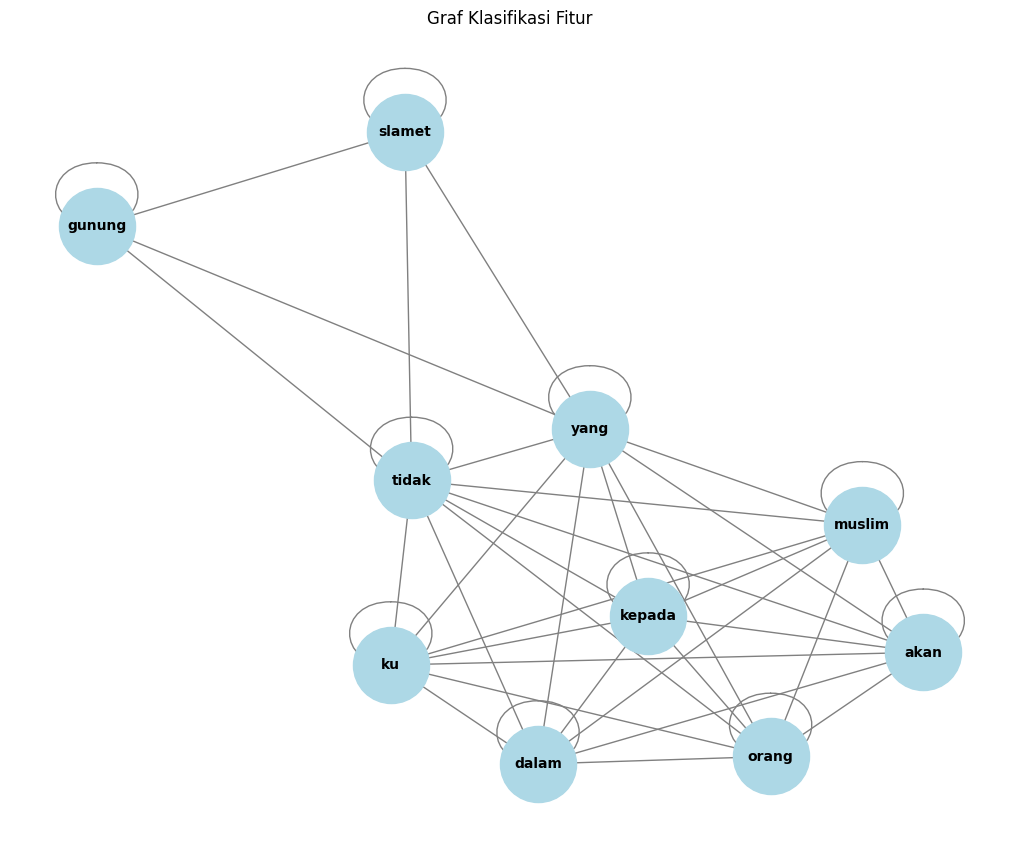

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Membuat graf dari matriks klasifikasi
G = nx.from_pandas_adjacency(classification)

# Menggambar graf
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Menggunakan spring layout untuk penempatan node
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
plt.title("Graf Klasifikasi Fitur")
plt.show()
